# Contours detection demo

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Load image

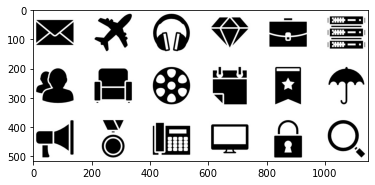

In [2]:
img = cv2.imread('./icons.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


## Convert to gray image

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray.shape


(517, 1149)

## Perform binary thresholding

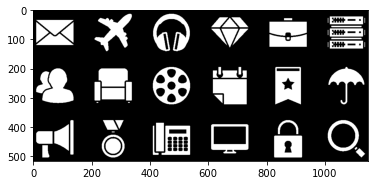

In [4]:
_, img_gray = cv2.threshold(img_gray, 64*3-1, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray, cmap='gray')


## Perform contours detection

In [5]:
contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'Total contour : {len(contours)}')
print('Countour details :')
print(contours)
print(f'Total hierarchy : {len(hierarchy)}')
print('Hierarchy details :')
print(hierarchy)


Total contour : 62
Countour details :
[array([[[1119,  473]],

       [[1107,  485]],

       [[1107,  486]],

       [[1108,  486]],

       [[1110,  488]],

       [[1110,  489]],

       [[1111,  490]],

       [[1112,  490]],

       [[1118,  496]],

       [[1118,  497]],

       [[1119,  498]],

       [[1120,  498]],

       [[1126,  504]],

       [[1138,  492]],

       [[1138,  491]],

       [[1137,  491]],

       [[1134,  488]],

       [[1134,  487]],

       [[1133,  487]],

       [[1131,  485]],

       [[1131,  484]],

       [[1130,  484]],

       [[1128,  482]],

       [[1128,  481]],

       [[1127,  481]],

       [[1124,  478]],

       [[1124,  477]],

       [[1123,  477]]], dtype=int32), array([[[1108,  469]],

       [[1103,  474]],

       [[1103,  475]],

       [[1106,  478]],

       [[1112,  472]],

       [[1109,  469]]], dtype=int32), array([[[ 32, 463]],

       [[ 32, 504]],

       [[ 52, 504]],

       [[ 53, 503]],

       [[ 54, 503]],

       

## Show border of detected area

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


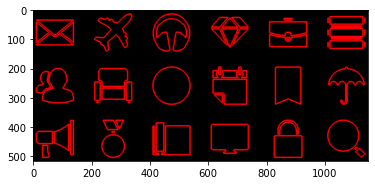

In [6]:
border_contours = np.zeros(img.shape)
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(border_contours, contours, i, (255,0,0), thickness=4)
plt.imshow(border_contours)


# Show detected area

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


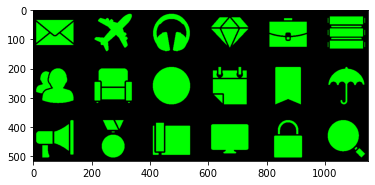

In [7]:
external_contours = np.zeros(img.shape)
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, (0,255,0), -1)
plt.imshow(external_contours)
